In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [62]:
df_high = pd.read_csv('../../data/top_Cos_novelty_regression.tsv', sep = '\t')
df_low = pd.read_csv('../../data/tail_Cos_novelty_regression.tsv', sep = '\t')

In [63]:
len(df_high), len(df_low)

(5038, 5038)

### Logistic

In [64]:
# def run_logit(df, field):
#     df['Intercept'] = 1.0
#     df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
#     logit_model = sm.Logit(df['binary'], df[[ 'Topic_entropy','Sentiment',\
#                 'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
#                 'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',\
#                 'ArchiveWarnings_noncon','Rating_E','Rating_G','Rating_M',\
#                 'Rating_T','Category_F_F','Category_F_M','Category_Gen','Category_M_M',\
#                 'Category_Multi','Category_Other','Freq_relationship',\
#                 'ChapterIndex','Chapters','Words', \
#        'Fandom_harry_potter','Fandom_dcu','Fandom_doctor_who', \
#        'Fandom_star_wars','Fandom_arthurian','Fandom_supernatural',\
#        'Fandom_haikyuu','Fandom_kuroko_no_basuke',\
#        'Fandom_hamilton_miranda','Fandom_dragon_age',\
#        'Fandom_the_walking_dead','Fandom_buffy','Fandom_les_miserables',\
#        'Fandom_naruto','Fandom_tolkien','Fandom_shakespare',\
#        'Fandom_hetalia','Fandom_attack_on_titan',\
#        'Fandom_ms_paint_adventures','Fandom_marvel',\
#        'Fandom_sailor_moon','Fandom_sherlock',\
#         'Intercept']]).fit(method='bfgs')
#     pred = logit_model.predict()
#     df['nonzero_prob'] = pred
#     return df

In [65]:
df.columns.values

array(['index', 'AdditionalTags', 'Author', 'Bookmarks', 'Chapters',
       'Characters', 'Hits', 'Kudos', 'Language', 'Title', 'Words',
       'Comments', 'URL', 'Term_novelty', 'Entropy', 'Text', 'Dist',
       'Topic_novelty', 'Freq_relationship', 'Topic_entropy', 'Sentiment',
       'Word_vectors', 'Category_F_F', 'Category_F_M', 'Category_Gen',
       'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'Rating_E', 'Rating_G', 'Rating_M',
       'Rating_N', 'Rating_T', 'Fandom_harry_potter', 'Fandom_dcu',
       'Fandom_doctor_who', 'Fandom_star_wars', 'Fandom_arthurian',
       'Fandom_supernatural', 'Fandom_haikyuu', 'Fandom_kuroko_no_basuke',
       'Fandom_hamilton_miranda', 'Fandom_dragon_age',
       'Fandom_the_walking_dead', 'Fandom_buffy', 'Fandom_les_miserables',


### OLS

In [66]:

def run_ols(df, field):
    df = df[df[field] != 0]
    df['Kudos'] = np.log(df['Kudos'])
    df['Hits'] = np.log(df['Hits'])
    df['Comments'] = np.log(df['Comments'])
    df['Bookmarks'] = np.log(df['Bookmarks'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    model = ols( field + " ~ + Topic_entropy + Entropy + Sentiment + Words + \
                ArchiveWarnings_underage + ArchiveWarnings_death + \
                ArchiveWarnings_no_apply + ArchiveWarnings_violence + \
                ArchiveWarnings_noncon + Rating_E + Rating_G + Rating_M + \
                Rating_T + Category_F_F + Category_F_M + Category_Gen + Category_M_M + \
                Category_Multi + Category_Other + Freq_relationship + \
        Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + \
       Fandom_star_wars + Fandom_arthurian + Fandom_supernatural +\
       Fandom_haikyuu + Fandom_kuroko_no_basuke + \
       Fandom_hamilton_miranda + Fandom_dragon_age +\
       Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables +\
       Fandom_naruto + Fandom_tolkien + Fandom_shakespare + \
       Fandom_hetalia + Fandom_attack_on_titan +\
       Fandom_ms_paint_adventures + Fandom_marvel +\
       Fandom_sailor_moon + Fandom_sherlock", data = df).fit()
    return model

### Plot coefficients

In [67]:
kudos_model_low = run_ols(df_low, 'Kudos')
kudos_coef_low = np.asarray(list(kudos_model_low.params)[1:])
kudos_err_low = list(kudos_model_low.bse)[1:]

kudos_model_high = run_ols(df_high, 'Kudos')
kudos_coef_high = np.asarray(list(kudos_model_high.params)[1:])
kudos_err_high = list(kudos_model_high.bse)[1:]

/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/anaconda3/envs/python36/lib/python3.6/si

In [68]:
hits_model_low = run_ols(df_low, 'Hits')
hits_coef_low = np.asarray(list(hits_model_low.params)[1:])
hits_err_low = list(hits_model_low.bse)[1:]

hits_model_high = run_ols(df_high, 'Hits')
hits_coef_high = np.asarray(list(hits_model_high.params)[1:])
hits_err_high = list(hits_model_high.bse)[1:]

/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/anaconda3/envs/python36/lib/python3.6/si

In [69]:
comments_model_low = run_ols(df_low, 'Comments')
comments_coef_low = np.asarray(list(comments_model_low.params)[1:])
comments_err_low = list(comments_model_low.bse)[1:]

comments_model_high = run_ols(df_high, 'Comments')
comments_coef_high = np.asarray(list(comments_model_high.params)[1:])
comments_err_high = list(comments_model_high.bse)[1:]

/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/anaconda3/envs/python36/lib/python3.6/si

In [70]:
bookmarks_model_low = run_ols(df_low, 'Bookmarks')
bookmarks_coef_low = np.asarray(list(bookmarks_model_low.params)[1:])
bookmarks_err_low = list(bookmarks_model_low.bse)[1:]

bookmarks_model_high = run_ols(df_high, 'Bookmarks')
bookmarks_coef_high = np.asarray(list(bookmarks_model_high.params)[1:])
bookmarks_err_high = list(bookmarks_model_high.bse)[1:]

/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/anaconda3/envs/python36/lib/python3.6/si

In [ ]:
Topic_entropy + Entropy + Sentiment + Words + \
                ArchiveWarnings_underage + ArchiveWarnings_death + \
                ArchiveWarnings_no_apply + ArchiveWarnings_violence + \
                ArchiveWarnings_noncon + Rating_E + Rating_G + Rating_M + \
                Rating_T + Category_F_F + Category_F_M + Category_Gen + Category_M_M + \
                Category_Multi + Category_Other + Freq_relationship + \
        Fandom_harry_potter + Fandom_dcu + Fandom_doctor_who + \
       Fandom_star_wars + Fandom_arthurian + Fandom_supernatural +\
       Fandom_haikyuu + Fandom_kuroko_no_basuke + \
       Fandom_hamilton_miranda + Fandom_dragon_age +\
       Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables +\
       Fandom_naruto + Fandom_tolkien + Fandom_shakespare + \
       Fandom_hetalia + Fandom_attack_on_titan +\
       Fandom_ms_paint_adventures + Fandom_marvel +\
       Fandom_sailor_moon + Fandom_sherlock"

In [71]:
ylabels =['Topic_entropy', 'Word_entropy', 'Sentiment', 'Words' , \
                'ArchiveWarnings(underage)', 'ArchiveWarnings(death)', \
                'ArchiveWarnings(no apply)', 'ArchiveWarnings(violence)', \
                'ArchiveWarnings(nonconsensual)' , 'Rating E' , 'Rating G' , 'Rating M' , \
                'Rating T' , 'Category F/F' , 'Category F/M' , 'Category Gen' , 'Category M/M' , \
                'Category Multi' , 'Category Other' , 'Frequent relationship' , \
        'Fandom harry potter' , 'Fandom dcu' , 'Fandom doctor who' , \
       'Fandom star wars' , 'Fandom arthurian' , 'Fandom supernatural' ,\
       'Fandom haikyuu' , 'Fandom kuroko no basuke' , \
       'Fandom hamilton miranda' , 'Fandom dragon age' ,\
       'Fandom the walking dead' , 'Fandom buffy' , 'Fandom les miserables' ,\
       'Fandom naruto' , 'Fandom tolkien' , 'Fandom shakespare' , \
       'Fandom hetalia' , 'Fandom attack on titan' ,\
       'Fandom ms paint adventures' , 'Fandom marvel' ,\
       'Fandom sailor moon' , 'Fandom sherlock'][::-1]

In [72]:
len(kudos_coef_high), len(ylabels)

(42, 42)

In [73]:
def plot_ax(ax, coef, err, top_tail_option, xlabel='', ylabel_flag=False):
    
    ax.errorbar(coef[::-1], range(len(coef)), xerr=err[::-1] , fmt='o', label=top_tail_option)
    ax.set_yticks(range(len(coef)))
    if ylabel_flag:
        ax.set_yticklabels(ylabels, fontsize=15)
    else:
        ax.set_yticklabels([])

    ax.plot([0 for i in range(len(coef)+2)], range(-1,len(coef)+1), c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    # ax[0].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
    ax.set_ylim(37.5,len(ylabels))
    ax.set_xlim(-2,2)
    if xlabel != '':
        ax.set_xlabel(xlabel, fontsize=15)
    # ax[0].set_title('R-squared = 0.256', fontsize=15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    ax.legend()

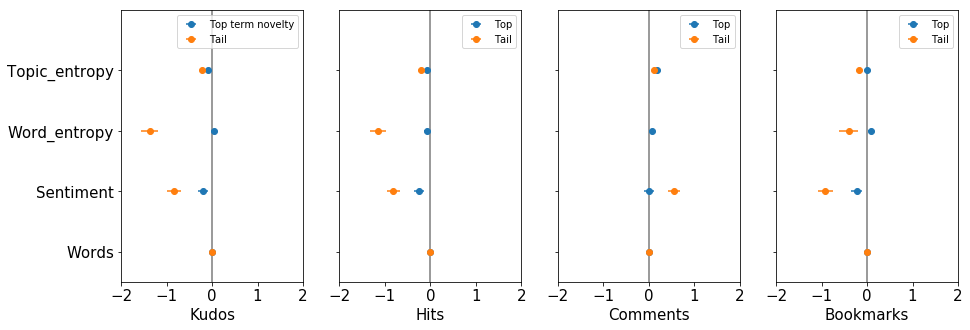

In [74]:
fig, ax = plt.subplots(1,4,figsize = (15,5))
plot_ax(ax=ax[0], coef=kudos_coef_high, err=kudos_err_high, top_tail_option='Top term novelty', xlabel='Kudos', ylabel_flag=True)
plot_ax(ax=ax[0], coef=kudos_coef_low, err=kudos_err_low, top_tail_option='Tail', ylabel_flag=True)
,
plot_ax(ax=ax[1], coef=hits_coef_high, err=hits_err_high, xlabel='Hits', top_tail_option='Top')
plot_ax(ax=ax[1], coef=hits_coef_low, err=hits_err_low, top_tail_option='Tail')

plot_ax(ax=ax[2], coef=comments_coef_high, err=comments_err_high, xlabel='Comments', ylabel_flag=False, top_tail_option='Top')
plot_ax(ax=ax[2], coef=comments_coef_low, err=comments_err_low, top_tail_option='Tail')

plot_ax(ax=ax[3], coef=bookmarks_coef_high, err=bookmarks_err_high, xlabel='Bookmarks', ylabel_flag=False, top_tail_option='Top')
plot_ax(ax=ax[3], coef=bookmarks_coef_low, err=bookmarks_err_low, top_tail_option='Tail')

# plt.savefig('ols_coefs_topic_novelty.pdf', format='pdf')

In [39]:
print(kudos_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     17.64
Date:                Thu, 30 Jan 2020   Prob (F-statistic):          2.55e-110
Time:                        17:11:21   Log-Likelihood:                -3374.0
No. Observations:                2462   AIC:                             6834.
Df Residuals:                    2419   BIC:                             7084.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [60]:
print(hits_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     155.9
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:40:51   Log-Likelihood:                -25806.
No. Observations:               18439   AIC:                         5.170e+04
Df Residuals:                   18393   BIC:                         5.206e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [61]:
print(comments_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Comments   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     30.29
Date:                Fri, 20 Sep 2019   Prob (F-statistic):          2.16e-246
Time:                        17:40:52   Log-Likelihood:                -24381.
No. Observations:               18439   AIC:                         4.885e+04
Df Residuals:                   18393   BIC:                         4.921e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [62]:
print(bookmarks_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Bookmarks   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     151.1
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:40:52   Log-Likelihood:                -27853.
No. Observations:               18439   AIC:                         5.580e+04
Df Residuals:                   18393   BIC:                         5.616e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
# fig = plt.figure(figsize=(20,20))
# fig = sm.graphics.plot_regress_exog(kudos_model, "Term_novelty", fig=fig)
# plt.savefig('partial_reg_plots_term_novelty.png', format='png')